# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [4]:
# Import relevant packages
import pandas as pd
import numpy
### YOUR CODE HERE ###

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA

### YOUR CODE HERE ###
aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [15]:
# Explore your DataFrame `aqi`.
aqi.tail()
### YOUR CODE HERE ###

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9
259,259,2018-01-01,North Carolina,Wake,Not in a city,Triple Oak,Carbon monoxide,Parts per million,0.188889,2


**Question:** What time range does this data cover?

[Write your response here. Double-click (or enter) to edit.]
The data covers the time range from 2018-01-01 to 2018-01-01.

In [10]:
aqi['date_local']=pd.to_datetime(aqi['date_local'])

start_date = aqi['date_local'].min()
end_date = aqi['date_local'].max()

In [14]:
print(f"The data covers the time range from {start_date.date()} to {end_date.date()}.")

The data covers the time range from 2018-01-01 to 2018-01-01.


In [19]:
min_aqi = aqi['aqi'].min()
max_aqi = aqi['aqi'].max()

#Display the results

print(f"The min AQI value is {min_aqi}.")
print(f"The max AQI value is {max_aqi}.")

The min AQI value is 0.
The max AQI value is 50.


**Question:** What are the minimum and maximum AQI values observed in the dataset?

[Write your response here. Double-click (or enter) to edit.]
The min AQI value is 0.
The max AQI value is 50.

**Question:** Are all states equally represented in the dataset?

[Write your response here. Double-click (or enter) to edit.]

In [21]:
# Count the number of records for each state using value_counts
state_counts = aqi['state_name'].value_counts()

# Display the counts of each state
print("State Counts:")
print(state_counts)

# Get a summary of the counts using describe
count_summary = state_counts.describe()
print("\nCount Summary:")
print(count_summary)

# Check the shape of the DataFrame to see total records
total_records = aqi.shape[0]
print(f"\nTotal number of records in the dataset: {total_records}")


State Counts:
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska      

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about descriptive statisics](https://www.coursera.org/learn/the-power-of-statistics/lecture/jVRS4/measures-of-central-tendency).
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `pandas` or `numpy` to explore the `aqi` DataFrame.
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use any of the following functions:
- `pandas`: `describe()`,`value_counts()`,`shape()`
- `numpy`: `unique()`,`mean()`
    
</details>

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [23]:
# Summarize the mean AQI for RRE states.

### YOUR CODE HERE ###

# Create a list of RRE states.

# Subset `aqi` to only consider these states.

# Find the mean aqi for each of the RRE states.
# List of states where RRE operates
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Filter the dataset for only the RRE states
rre_aqi = aqi[aqi['state_name'].isin(rre_states)]

# Group by state and calculate the mean AQI for each state
mean_aqi_summary = rre_aqi.groupby('state_name')['aqi'].mean().reset_index()

# Rename the columns for clarity
mean_aqi_summary.columns = ['State', 'Mean AQI']

# Display the mean AQI summary
print(mean_aqi_summary)


          State   Mean AQI
0    California  12.121212
1       Florida   5.500000
2      Michigan   8.111111
3          Ohio   3.333333
4  Pennsylvania   2.900000
5         Texas   2.700000


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset your DataFrame to only include those states in which RRE operates. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Define a list consisting of the states in which RRE operates and use that list to subset your DataFrame. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `isin.()` to subset your DataFrame by the list of RRE states.
    
</details>

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [26]:
# Import seaborn as sns.
import seaborn as sns
### YOUR CODE HERE ###

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

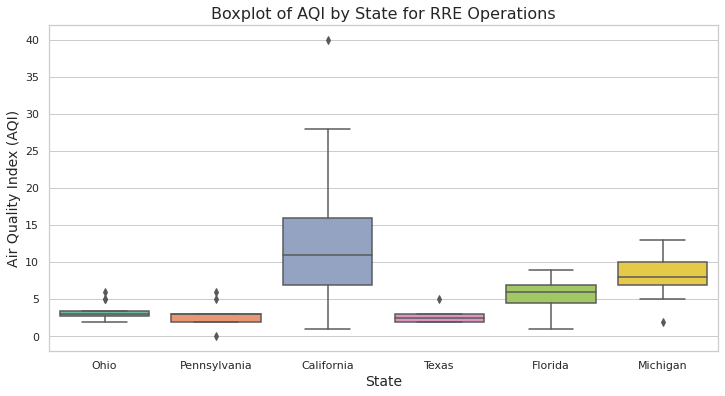

In [27]:
### YOUR CODE HERE ###
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset has already been loaded into 'aqi'

# List of states where RRE operates
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Filter the dataset for only the RRE states
rre_aqi = aqi[aqi['state_name'].isin(rre_states)]

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(data=rre_aqi, x='state_name', y='aqi', palette='Set2')

# Adding titles and labels
plt.title('Boxplot of AQI by State for RRE Operations', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Air Quality Index (AQI)', fontsize=14)

# Display the plot
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the boxplot visual for this purpose.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Reference [Seaborn's boxplot visualization documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Assign `state_name` to the x argument and `aqi` to the y.
    
</details>

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

[Write your response here. Double-click (or enter) to edit.]
California

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider the mean AQI for the RRE states, as well as the distribution in the boxplots relative to the policy limit (10).
    
</details>

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [28]:
# Find the mean aqi for your state.

### YOUR CODE HERE ###
# Filter the dataset for California
california_aqi = rre_aqi[rre_aqi['state_name'] == 'California']

# Calculate the mean AQI for California
mean_aqi_california = california_aqi['aqi'].mean()
print(f"Mean AQI for California: {mean_aqi_california}")



Mean AQI for California: 12.121212121212121


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Reference what you've previously learned to recall what a [sample statistic](https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size) is.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Calculate the mean for your highest AQI state to arrive at your sample statistic.
    
</details>

<details>
 <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `mean()` function within `pandas` on your DataFrame.
    
</details>

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [29]:
# Input your confidence level here:

### YOUR CODE HERE ###
# Choose a confidence level (95%)
confidence_level = 0.95  # You can change this to 0.90 or 0.99 if needed


### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [31]:
# Calculate your margin of error.

### YOUR CODE HERE ###

# Begin by identifying the z associated with your chosen confidence level.

# Next, calculate your standard error.

# Lastly, use the preceding result to calculate your margin of error.
import pandas as pd
import numpy as np
from scipy import stats

# Assuming the dataset has already been loaded into 'aqi'

# List of states where RRE operates
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Filter the dataset for only the RRE states
rre_aqi = aqi[aqi['state_name'].isin(rre_states)]

# Step 1: Identify a sample statistic (Mean AQI for California)
california_aqi = rre_aqi[rre_aqi['state_name'] == 'California']
mean_aqi_california = california_aqi['aqi'].mean()
print(f"Mean AQI for California: {mean_aqi_california}")

# Step 2: Choose a confidence level (95%)
confidence_level = 0.95

# Step 3: Find the z-value for the chosen confidence level
z_value = 1.960  # Z-value for 95% confidence level

# Calculate sample size (n) and standard deviation (s)
n = california_aqi.shape[0]  # Sample size
std_dev = california_aqi['aqi'].std()  # Standard deviation

# Step 4: Calculate the standard error (SE)
standard_error = std_dev / np.sqrt(n)
print(f"Standard Error: {standard_error}")

# Step 5: Calculate the margin of error
margin_of_error = z_value * standard_error
print(f"Margin of Error: {margin_of_error}")

# Step 6: Calculate the confidence interval
confidence_interval = (mean_aqi_california - margin_of_error, mean_aqi_california + margin_of_error)
print(f"Confidence Interval for the mean AQI of California: {confidence_interval}")


Mean AQI for California: 12.121212121212121
Standard Error: 0.8987209641127412
Margin of Error: 1.7614930896609726
Confidence Interval for the mean AQI of California: (10.359719031551148, 13.882705210873095)


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [32]:
# Calculate your confidence interval (upper and lower limits).

### YOUR CODE HERE ###
# Assuming all previous calculations have been performed

# Step 6: Calculate the confidence interval
lower_limit = mean_aqi_california - margin_of_error
upper_limit = mean_aqi_california + margin_of_error

# Display the confidence interval limits
print(f"Lower Limit of Confidence Interval: {lower_limit}")
print(f"Upper Limit of Confidence Interval: {upper_limit}")


Lower Limit of Confidence Interval: 10.359719031551148
Upper Limit of Confidence Interval: 13.882705210873095


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a confidence interval](https://www.coursera.org/learn/the-power-of-statistics/lecture/3jbsX/construct-a-confidence-interval-for-a-proportion).
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Identify the sample mean from your prior work. Then use the margin of error to construct your upper and lower limits.  
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.
    
</details>

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [33]:
# Import stats from scipy.
from scipy import stats
### YOUR CODE HERE ###

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [35]:
### YOUR CODE HERE ###
confidence_interval = stats.norm.interval(confidence_level, loc=mean_aqi_california, scale=standard_error)

# Display the confidence interval limits
print(f"Confidence Interval for the mean AQI of California: {confidence_interval}")

Confidence Interval for the mean AQI of California: (10.359751399400034, 13.882672843024208)


# Considerations

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**What findings would you share with others?**

[Write your response here. Double-click (or enter) to edit.]

**What would you convey to external stakeholders?**

[Write your response here. Double-click (or enter) to edit.]

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.